In [50]:
import ROOT
import uproot
import matplotlib.pyplot as plt
import scipy as scp
from scipy.integrate import trapezoid
import numpy as np
import awkward as ak
import pybaselines

In [51]:
FILE_PATH = "../Dati/Ortopositronio/run_chall_ortho_batch_aaAscii_0000.root" #Relative file path
file = uproot.open(FILE_PATH)
file["tree"].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
ev                   | int32_t                  | AsDtype('>i4')
nch                  | int32_t                  | AsDtype('>i4')
ch                   | int32_t[]                | AsJagged(AsDtype('>i4'))
base                 | float[]                  | AsJagged(AsDtype('>f4'))
amp                  | float[]                  | AsJagged(AsDtype('>f4'))
charge               | float[]                  | AsJagged(AsDtype('>f4'))
letime               | float[]                  | AsJagged(AsDtype('>f4'))
tetime               | float[]                  | AsJagged(AsDtype('>f4'))
pshape               | float[][1024]            | AsJagged(AsDtype("('>f4', (...


In [52]:
print(type(file["tree"]["base"].array()))
bl=file["tree"]["base"].array()
print(ak.num(bl))
#bl = bl[:-1]
print(np.unique(ak.num(bl)))
#l'ultimo array aveva una forma diversa, quindi l'ho tagliato altrimenti faceva casini

nch=file["tree"]["ch"].array()
print(nch)

<class 'awkward.highlevel.Array'>
[16, 16, 16, 16, 16, 16, 16, 16, 16, ..., 16, 16, 16, 16, 16, 16, 16, 16, 13]
[13, 16]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], ..., [0, 1, ..., 12]]


In [53]:
baselines = np.array(file["tree"]["base"])[1:-1] 
charges = np.array(file["tree"]["charge"])[1:-1]
amp = np.array(file["tree"]["amp"])[1:-1]
lead_edge = np.array(file["tree"]["letime"])[1:-1]
t_edge = np.array(file["tree"]["tetime"])[1:-1]
channel= np.array(file["tree"]["ch"])[1:-1]
waveform = np.array(file["tree"]["pshape"])[1:-1]


In [54]:
print(amp.shape)
print(charges.shape)
print(len(amp))

(254,)
(254,)
254


In [55]:
len(np.where(amp[0]>-1.2)[0])==16

True

In [56]:
print(channel)

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       dtype=int32)
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       dtype=int32)
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       dtype=int32)
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       dtype=int32)
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       dtype=int32)
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       dtype=int32)
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       dtype=int32)
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       dtype=int32)
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       dtype=int32)
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       dtype=int32)
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15

In [57]:

mask=[len(np.where(amp[i]>-1.2)[0])==16 for i in range(len(amp))]
print(mask)
baselines=baselines[mask]
charges=charges[mask]
amp=amp[mask]
lead_edge=lead_edge[mask]
t_edge=t_edge[mask]
channel=channel[mask]
waveform=waveform[mask]

[True, True, False, True, False, False, False, True, True, True, True, True, False, True, True, True, True, False, False, True, True, False, True, True, False, True, True, False, False, True, True, True, True, True, True, True, True, False, True, True, False, True, True, True, True, False, True, True, False, True, False, True, False, True, True, False, False, True, True, True, True, True, True, True, True, False, True, True, False, True, False, False, True, True, True, False, False, True, False, True, False, False, True, True, True, True, True, False, False, True, True, True, False, False, True, False, True, False, True, True, False, True, False, False, True, True, False, True, True, True, True, True, True, True, False, True, True, True, False, True, False, False, True, True, True, False, False, True, True, True, True, True, True, False, False, True, True, True, True, True, True, False, True, True, False, False, True, True, True, True, False, True, True, False, True, True, True, False,

In [58]:
print(len(amp))
Nev=len(amp)

180


(180,)
channel: 1 baseline: 0.000953 charge -903.926 lead_edge 455.171 trailing_edge -0.005
channel: 2 baseline: 0.000114 charge -406.178 lead_edge 80.457 trailing_edge 71.707
channel: 7 baseline: 0.000152 charge -643.553 lead_edge 197.348 trailing_edge -0.003
channel: 12 baseline: -0.003622 charge -180.677 lead_edge 164.494 trailing_edge 128.935


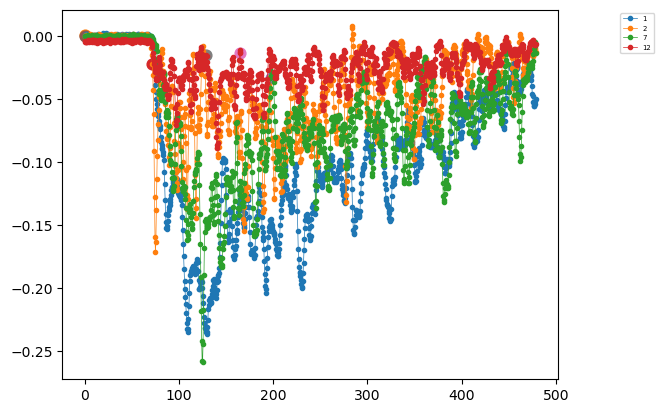

In [61]:
print(waveform.shape)
event=129
list = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
list=[1,2,7,12]
sampling=0.468
for channel in list:
    time=np.arange(1024)
    plt.plot(time*sampling, waveform[event][channel], '.-', label='{}'.format(channel), linewidth=0.5)
    print("channel:", channel, "baseline:",  baselines[event][channel],"charge", charges[event][channel], "lead_edge", lead_edge[event][channel], "trailing_edge", t_edge[event][channel] )
    t1=lead_edge[event][channel]
    t2=t_edge[event][channel]
    #print(t1,t2)
    plt.scatter( t1, waveform[event][channel][int(t1/sampling)],s=60   )
    plt.scatter( t2, waveform[event][channel][int(t2/sampling)],s=60  )
    #plt.xlim(400,600)
    #plt.ylim(-0.01, 0.1)

plt.legend(fontsize=5, loc='upper right', bbox_to_anchor=(1.2, 1))

In [ ]:
###pulizia
list = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
true_charges=[]
true_amps=[]
true_channels=[]
true_waveforms=[]
true_ledge=[]
for ev in range(Nev):
    interesting_channels=np.where(charges[ev]<-50)[0] #canali che hanno visto qualcosa
    true_channels.append(interesting_channels.tolist())
    true_charges.append([charges[ev][ch] for ch in interesting_channels])
    true_amps.append([amp[ev][ch] for ch in interesting_channels])
    true_waveforms.append([waveform[ev][ch] for ch in interesting_channels])
    true_ledge.append([lead_edge[ev][ch] for ch in interesting_channels])


print(true_channels)
print(true_charges)





[[7, 9, 11], [3, 11, 13], [4, 9, 12], [0, 3, 15], [2, 9, 14], [9, 11, 14], [0, 2, 11], [5, 6, 7], [0, 10, 15], [4, 6, 11], [0, 3, 9], [3, 4, 7], [4, 6, 13], [2, 4, 12], [2, 4, 8, 12], [2, 5, 12], [2, 4, 6], [2, 3, 13], [0, 6, 15], [3, 4, 5, 12], [0, 5, 14], [0, 9, 15], [1, 2, 13], [1, 2, 12], [2, 5, 12], [1, 7, 12], [0, 5, 14], [2, 3, 12], [4, 9, 11], [2, 4, 9], [4, 7, 11], [7, 9, 11], [0, 2, 9], [10, 12, 15], [10, 12, 13], [3, 7, 9], [1, 2, 4], [1, 10, 11], [3, 7, 8, 10, 15], [4, 10, 12], [3, 9, 11], [3, 7, 9], [3, 9, 13], [7, 10, 14], [4, 9, 12], [11, 13, 14], [0, 2, 15], [0, 12, 15], [9, 10, 13], [2, 4, 10], [1, 10, 15], [1, 2, 12], [0, 2, 15], [3, 4, 15], [0, 2, 10], [3, 7, 10], [4, 6, 9, 12, 15], [3, 7, 9], [4, 12, 13], [2, 11, 13], [2, 5, 13], [4, 6, 11], [7, 9, 12], [2, 5, 11], [9, 10, 13], [5, 7, 12], [6, 9, 11, 14], [10, 11, 13], [0, 4, 5], [3, 4, 12], [5, 10, 15], [1, 2, 10], [3, 11, 13], [3, 8, 9], [0, 10, 13], [0, 2, 15], [2, 10, 12], [1, 14, 15], [0, 10, 14], [0, 2, 13], [

In [ ]:
#eventi con 3 gamma
n_photons=[len(true_channels[i]) for i in range(Nev)]
n_photons=np.array(n_photons)
three_gamma_events=np.where(n_photons == 4)[0] #eventi con 4 fotoni totali (ortopositronio?)
print(three_gamma_events)

[ 14  19  66  93 126 129 130 132 142 162]


channel: 2 baseline: 0.000419 charge -1242.338 lead_edge 375.188 trailing_edge -0.014
channel: 4 baseline: 0.000419 charge -276.629 lead_edge 177.899 trailing_edge 0.013
channel: 8 baseline: -3.8e-05 charge -146.279 lead_edge 257.818 trailing_edge 204.753
channel: 12 baseline: -0.004079 charge -1462.806 lead_edge 396.138 trailing_edge -0.005
channel: 3 baseline: 0.000267 charge -477.69 lead_edge 251.145 trailing_edge -0.006
channel: 4 baseline: -0.006977 charge -203.063 lead_edge 103.568 trailing_edge 21.123
channel: 5 baseline: 0.000305 charge -1989.816 lead_edge 427.255 trailing_edge 76.551
channel: 12 baseline: -0.031301 charge -211.808 lead_edge 120.464 trailing_edge 10.167
channel: 6 baseline: -3.8e-05 charge -3149.426 lead_edge 0.005 trailing_edge 0.005
channel: 9 baseline: -0.000229 charge -366.083 lead_edge 323.526 trailing_edge -0.002
channel: 11 baseline: -7.6e-05 charge -929.916 lead_edge 0.001 trailing_edge 98.692
channel: 14 baseline: -0.000229 charge -156.237 lead_edge 22

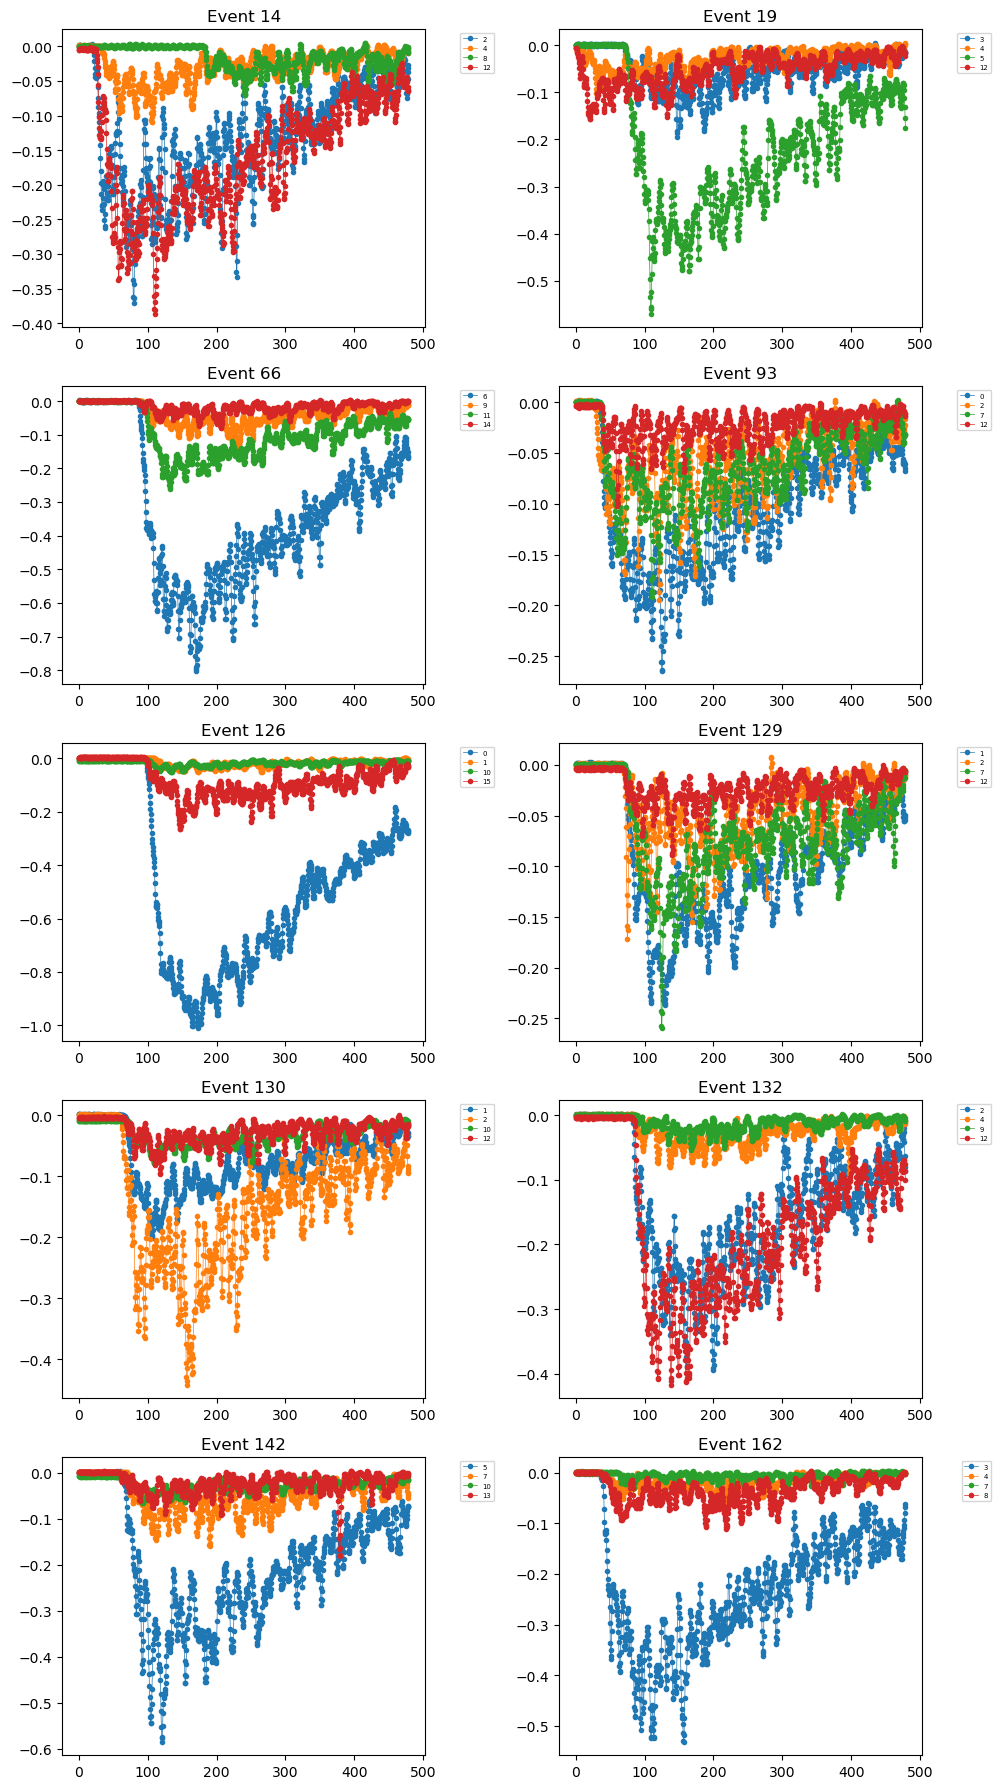

In [ ]:
#plot degli eventi di papabile ortopositronio

# Define the number of events to plot
num_events = len(three_gamma_events)

# Define the layout of subplots
num_cols = 2  # Number of columns of subplots
num_rows = (num_events + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create a new figure and axes for each subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 18))

# Flatten the axes array if it's multidimensional
axes = axes.flatten()

# Loop over each event in the event list
for i, event in enumerate(three_gamma_events):
    # Retrieve the list of channels for the current event
    list = true_channels[event]
    
    # Plot waveforms for each channel in the event
    for channel in list:
        time = np.arange(1024)  # Create an array of time samples
        axes[i].plot(time * sampling, waveform[event][channel], '.-', label='{}'.format(channel), linewidth=0.5)
        print("channel:", channel, "baseline:", baselines[event][channel], "charge", charges[event][channel], "lead_edge", lead_edge[event][channel], "trailing_edge", t_edge[event][channel])
        t1 = lead_edge[event][channel]
        t2 = t_edge[event][channel]
        #axes[i].scatter(t1, waveform[event][channel][int(t1 / sampling)], s=60)
        #axes[i].scatter(t2, waveform[event][channel][int(t2 / sampling)], s=60)
    
    # Add legend to the subplot
    axes[i].legend(fontsize=5, loc='upper right', bbox_to_anchor=(1.2, 1))
    axes[i].set_title(f'Event {event}')  # Set title for the subplot

# Adjust layout and display the plot
plt.tight_layout()
plt.show()



In [ ]:
print([true_charges[ev] for ev in three_gamma_events])

[[-1242.338, -276.629, -146.279, -1462.806], [-477.69, -203.063, -1989.816, -211.808], [-3149.426, -366.083, -929.916, -156.237], [-973.871, -513.552, -584.927, -170.57], [-4511.732, -153.486, -87.95, -820.723], [-903.926, -406.178, -643.553, -180.677], [-691.574, -1352.154, -211.036, -218.729], [-1349.638, -222.704, -104.68, -1556.447], [-1931.356, -460.886, -172.938, -232.13], [-2129.809, -150.712, -54.531, -321.156]]
